<a href="https://colab.research.google.com/github/neel26desai/data_cleaning_and_eda/blob/main/EDAAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [4]:
import os
import librosa
from pathlib import Path

#let us generate a file to transcription dictiontionary for each for


In [7]:
import librosa
from pathlib import Path

# Function to load audio files and their corresponding transcriptions for a chapter
def load_librispeech_chapter(librispeech_path, book_id, chapter_id):
    chapter_path = Path(librispeech_path) / book_id / chapter_id
    transcript_file = f"{book_id}-{chapter_id}.trans.txt"
    transcript_path = chapter_path / transcript_file

    # Load and split the transcript file
    with open(transcript_path, 'r') as file:
        transcript_lines = file.read().strip().split('\n')

    # Parse the transcripts
    transcripts = {line.split(' ')[0]: ' '.join(line.split(' ')[1:]) for line in transcript_lines}

    # Load each audio file and associate it with the correct transcript
    chapter_data = {}
    for audio_file in chapter_path.glob('*.flac'):
        utt_id = audio_file.stem  # Get the base filename without the .flac extension
        audio, sr = librosa.load(audio_file, sr=None)  # Load the audio file
        chapter_data[utt_id] = {
            'audio': audio,
            'sampling_rate': sr,
            'transcript': transcripts[utt_id]
        }

    return chapter_data

# Set the path to the LibriSpeech dev-other directory
librispeech_dev_other_path = '/content/drive/MyDrive/LibriSpeech/dev-other'  # Change this to your actual path

# Specify the book ID and chapter ID you want to load
book_id = '700'  # Replace with your book ID
chapter_id = '122866'  # Replace with your chapter ID

# Load the chapter data
chapter_data = load_librispeech_chapter(librispeech_dev_other_path, book_id, chapter_id)

# Now you can access the audio and transcripts for each file in the chapter
for utt_id, data in chapter_data.items():
    print(f"ID: {utt_id}")
    print(f"Sampling Rate: {data['sampling_rate']}")
    print(f"Transcript: {data['transcript'][:30]}...")  # Print the first 30 characters of the transcript
    # You can process the `data['audio']` and `data['transcript']` as needed


ID: 700-122866-0042
Sampling Rate: 16000
Transcript: NOW I WOULDN'T HAVE FELT THAT ...
ID: 700-122866-0041
Sampling Rate: 16000
Transcript: MISSUS LYNDE SAYS SHE ALWAYS F...
ID: 700-122866-0038
Sampling Rate: 16000
Transcript: MISS JOSEPHINE BARRY WROTE BAC...
ID: 700-122866-0037
Sampling Rate: 16000
Transcript: JANE AND RUBY ALMOST ALWAYS CR...
ID: 700-122866-0036
Sampling Rate: 16000
Transcript: I READ ONE OF MY STORIES TO HI...
ID: 700-122866-0034
Sampling Rate: 16000
Transcript: I'M SURE THAT MUST HAVE A WHOL...
ID: 700-122866-0033
Sampling Rate: 16000
Transcript: MINE IS ROSAMOND MONTMORENCY A...
ID: 700-122866-0040
Sampling Rate: 16000
Transcript: I FELT SO ENCOURAGED WHEN I HE...
ID: 700-122866-0035
Sampling Rate: 16000
Transcript: THE MORAL IS THE GREAT THING M...
ID: 700-122866-0032
Sampling Rate: 16000
Transcript: EACH GIRL HAS TO READ HER STOR...
ID: 700-122866-0031
Sampling Rate: 16000
Transcript: NO BOYS WERE ALLOWED IN IT ALT...
ID: 700-122866-0039
Sampling Rate: 16000
Tr

Average audio length: 4.98 seconds
Max audio length: 15.34 seconds
Min audio length: 2.00 seconds
Average transcript length: 76.51 characters
Max transcript length: 245.00 characters
Min transcript length: 22.00 characters
Average word count: 14.77 words
Max word count: 47.00 words
Min word count: 5.00 words


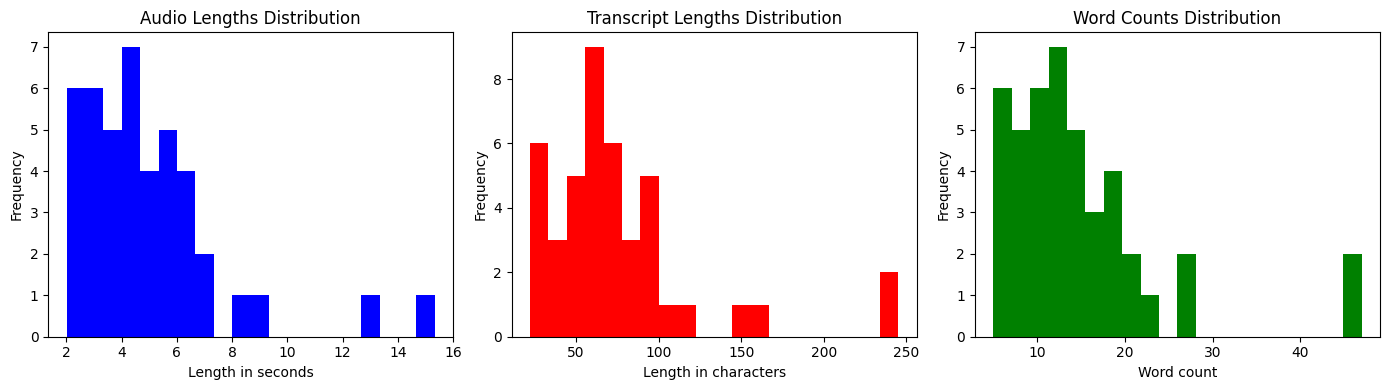

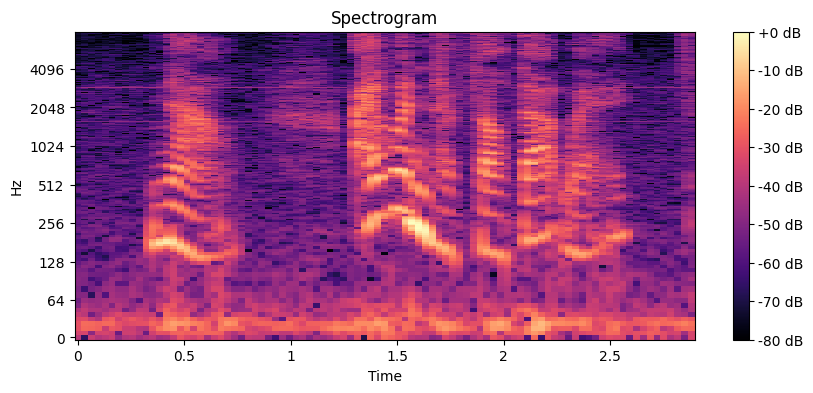

In [9]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Assuming `chapter_data` is loaded as per the previous discussion
# We'll use this to collect some statistics and visualize data

# Initialize lists to store EDA data
audio_lengths = []
transcript_lengths = []
word_counts = []

# Collecting data for EDA
for utt_id, data in chapter_data.items():
    audio_lengths.append(len(data['audio']) / data['sampling_rate'])  # Length of audio in seconds
    transcript_lengths.append(len(data['transcript']))  # Length of transcript
    word_counts.append(len(data['transcript'].split()))  # Number of words in transcript

# Convert lists to numpy arrays for easier manipulation
audio_lengths = np.array(audio_lengths)
transcript_lengths = np.array(transcript_lengths)
word_counts = np.array(word_counts)

# Basic statistics
print(f"Average audio length: {np.mean(audio_lengths):.2f} seconds")
print(f"Max audio length: {np.max(audio_lengths):.2f} seconds")
print(f"Min audio length: {np.min(audio_lengths):.2f} seconds")

print(f"Average transcript length: {np.mean(transcript_lengths):.2f} characters")
print(f"Max transcript length: {np.max(transcript_lengths):.2f} characters")
print(f"Min transcript length: {np.min(transcript_lengths):.2f} characters")

print(f"Average word count: {np.mean(word_counts):.2f} words")
print(f"Max word count: {np.max(word_counts):.2f} words")
print(f"Min word count: {np.min(word_counts):.2f} words")

# Visualizing distributions
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.hist(audio_lengths, bins=20, color='blue')
plt.title('Audio Lengths Distribution')
plt.xlabel('Length in seconds')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(transcript_lengths, bins=20, color='red')
plt.title('Transcript Lengths Distribution')
plt.xlabel('Length in characters')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(word_counts, bins=20, color='green')
plt.title('Word Counts Distribution')
plt.xlabel('Word count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Spectrogram of the first audio file
utt_id, data = next(iter(chapter_data.items()))
audio, sr = data['audio'], data['sampling_rate']
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


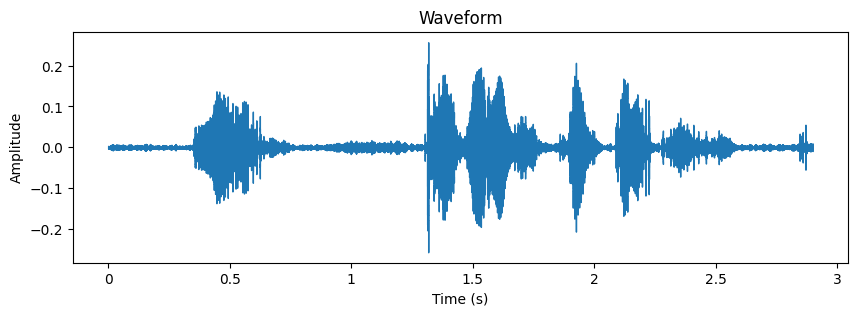

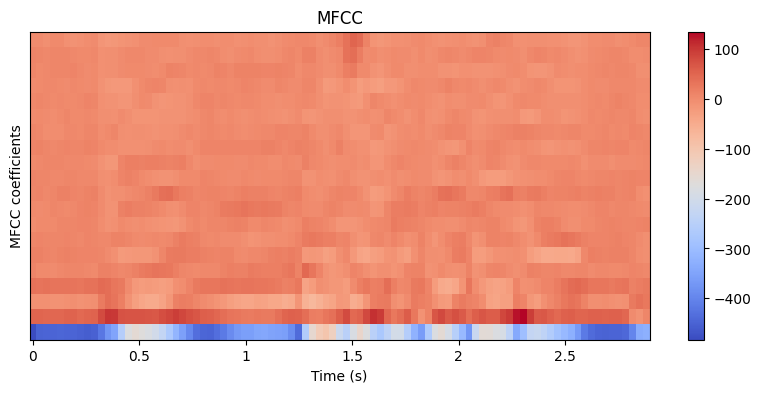

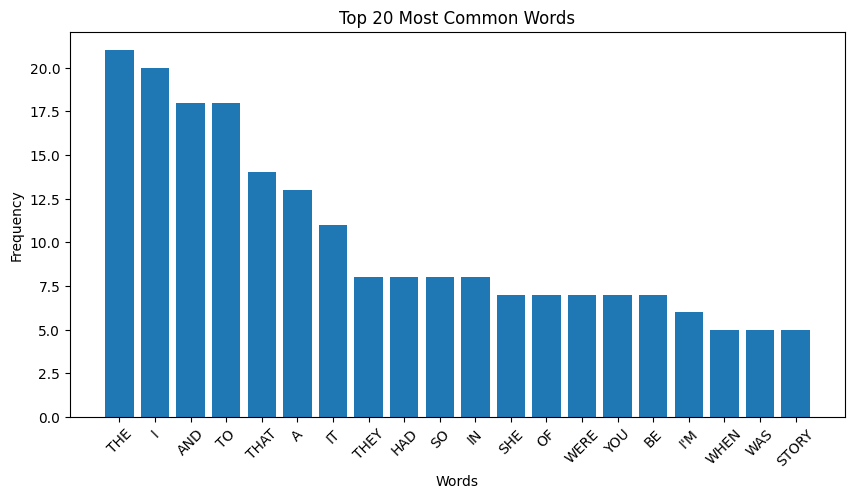

In [13]:
from collections import Counter

# Assuming `chapter_data` is loaded as per the previous discussion

# Plotting the waveform of the first audio file
utt_id, data = next(iter(chapter_data.items()))
audio, sr = data['audio'], data['sampling_rate']

plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plotting the MFCCs of the first audio file
mfccs = librosa.feature.mfcc(y=audio, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC coefficients')
plt.show()

# Word frequency distribution in the transcripts
all_words = ' '.join([data['transcript'] for data in chapter_data.values()]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plotting word frequencies
words, freqs = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Data Cleaning

In [ ]:
import librosa
import soundfile as sf
import string

# Assuming `chapter_data` is a dictionary loaded with audio and transcripts
cleaned_data = {}

for utt_id, data in chapter_data.items():
    audio, sr, transcript = data['audio'], data['sampling_rate'], data['transcript']

    # Normalize volume
    rms = np.sqrt(np.mean(audio**2))
    desired_rms = 0.05
    audio = audio * (desired_rms / rms)

    # Trim silence (using a threshold and a buffer for leading and trailing non-silence)
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=30)

    # Remove punctuation from transcript
    transcript = transcript.translate(str.maketrans('', '', string.punctuation))

    # Convert to lower case
    transcript = transcript.lower()

    # Save the cleaned audio and transcript
    cleaned_data[utt_id] = {
        'audio': trimmed_audio,
        'sampling_rate': sr,
        'transcript': transcript
    }

    # Optionally, save the cleaned audio to a file
    cleaned_audio_path = f"/content/drive/MyDrive/LibriSpeech/cleaned/audio/{utt_id}.wav"
    sf.write(cleaned_audio_path, trimmed_audio, sr)
